In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import matplotlib
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.metrics import mean_squared_error
from numpy import array

In [2]:
df = pd.read_excel('Final_Brajrajnagar_data.xlsx')
df = df.drop(['Unnamed: 0'],axis = 1)
df.head()

,From Date,PM10,PM2.5,WD,WS,AT
0,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

From Date    datetime64[ns]
PM10                float64
PM2.5               float64
WD                  float64
WS                  float64
AT                  float64
dtype: object

In [4]:
df.reset_index(inplace = True)
df = df.drop(['index'], axis = 1)
df['From Date'] = pd.to_datetime(df['From Date'])
df['From Date'] = pd.to_datetime(df['From Date'])


df.dtypes
df.head()

,From Date,PM10,PM2.5,WD,WS,AT
0,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN


In [5]:
#Set the date as Index
df = df.set_index(df['From Date'],drop = True)
df = df.sort_index()

#Take the mean of each day 
df = df.resample('d').mean()
df.head()
#Removing the outlier
df = df['2018-01':'2020-02']
df_ospcb = df.copy()

df_ospcb.head()

,PM10,PM2.5,WD,WS,AT
From Date,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,209.367553,96.456277,110.399053,0.787158,25.485895
2018-01-04,148.470978,57.417609,131.992043,1.210645,27.404839
2018-01-05,101.171569,50.440980,161.040769,1.164038,26.170962


In [6]:
date_series = df_ospcb.index
date_series

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
               '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
               '2020-02-28', '2020-02-29'],
              dtype='datetime64[ns]', name='From Date', length=790, freq='D')

In [7]:
print(df_ospcb.columns)

Index(['PM10', 'PM2.5', 'WD', 'WS', 'AT'], dtype='object')


In [8]:
from sklearn.impute import KNNImputer

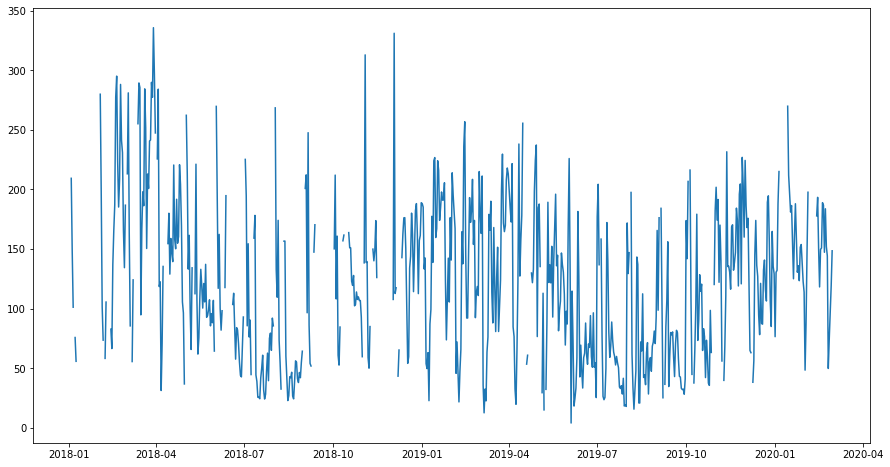

In [9]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,8

plt.plot(df_ospcb['PM10'])

In [10]:
# imputer = KNNImputer(n_neighbors=200, weights='distance')
# df_ospcb_imputed_knn = imputer.fit_transform(df_ospcb)
from fancyimpute import IterativeImputer
mice_imputer = IterativeImputer()
df_ospcb_imputed_knn =  mice_imputer.fit_transform(df_ospcb)

Using TensorFlow backend.


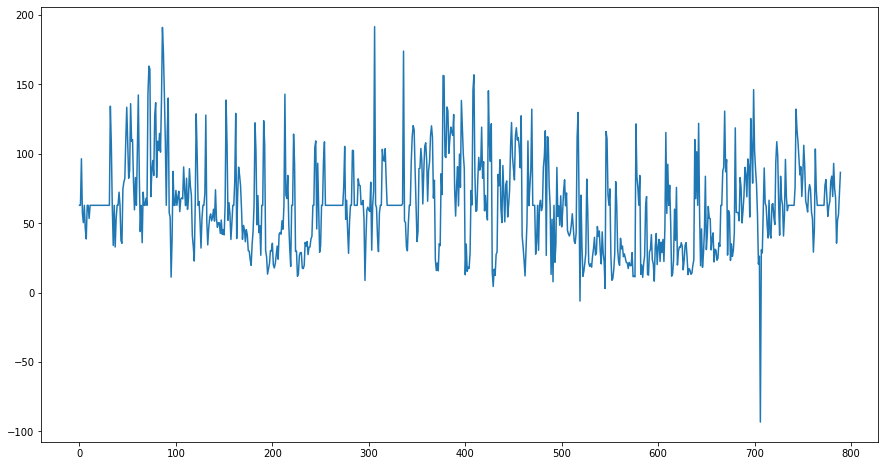

In [11]:
plt.plot(df_ospcb_imputed_knn[:, 1])

In [12]:
df_ospcb_after_impute = pd.DataFrame(data = df_ospcb_imputed_knn, columns = df_ospcb.columns)
df_ospcb_after_impute.head()

,PM10,PM2.5,WD,WS,AT
0,121.205710,62.935422,174.824048,0.660162,25.619896
1,121.205710,62.935422,174.824048,0.660162,25.619896
2,209.367553,96.456277,110.399053,0.787158,25.485895
3,148.470978,57.417609,131.992043,1.210645,27.404839
4,101.171569,50.440980,161.040769,1.164038,26.170962


In [13]:
df_ospcb_after_impute['Date'] = date_series
df_ospcb_after_impute.head()

,PM10,PM2.5,WD,WS,AT,Date
0,121.205710,62.935422,174.824048,0.660162,25.619896,2018-01-01
1,121.205710,62.935422,174.824048,0.660162,25.619896,2018-01-02
2,209.367553,96.456277,110.399053,0.787158,25.485895,2018-01-03
3,148.470978,57.417609,131.992043,1.210645,27.404839,2018-01-04
4,101.171569,50.440980,161.040769,1.164038,26.170962,2018-01-05


In [14]:
#Set the date as Index
df_ospcb_after_impute = df_ospcb_after_impute.set_index(df_ospcb_after_impute['Date'], drop = True)
df_ospcb_after_impute = df_ospcb_after_impute.sort_index()
df_ospcb_after_impute.head()

,PM10,PM2.5,WD,WS,AT,Date
Date,,,,,,
2018-01-01,121.205710,62.935422,174.824048,0.660162,25.619896,2018-01-01
2018-01-02,121.205710,62.935422,174.824048,0.660162,25.619896,2018-01-02
2018-01-03,209.367553,96.456277,110.399053,0.787158,25.485895,2018-01-03
2018-01-04,148.470978,57.417609,131.992043,1.210645,27.404839,2018-01-04
2018-01-05,101.171569,50.440980,161.040769,1.164038,26.170962,2018-01-05


In [15]:
df_ospcb_after_impute = df_ospcb_after_impute.drop(['Date'], axis = 1)
df_ospcb_after_impute.head()

,PM10,PM2.5,WD,WS,AT
Date,,,,,
2018-01-01,121.205710,62.935422,174.824048,0.660162,25.619896
2018-01-02,121.205710,62.935422,174.824048,0.660162,25.619896
2018-01-03,209.367553,96.456277,110.399053,0.787158,25.485895
2018-01-04,148.470978,57.417609,131.992043,1.210645,27.404839
2018-01-05,101.171569,50.440980,161.040769,1.164038,26.170962


In [16]:
df_index_list = df_ospcb_after_impute.index.values
years = pd.DatetimeIndex(df_index_list)
list_year = years.year
list_month = years.month
list_day = years.day
list_dayOfWeek = years.dayofweek
df_ospcb_after_impute['year'] = list_year 
df_ospcb_after_impute['month'] = list_month 
df_ospcb_after_impute['day'] = list_day
df_ospcb_after_impute['day_of_week'] = list_dayOfWeek

#Determining Weekend
def weekend(row):
   if (row == 5) or (row == 6):
       return 1
   else:
       return 0

df_ospcb_after_impute['weekend'] = df_ospcb_after_impute['day_of_week'].apply(weekend)
df_ospcb_after_impute.head()

,PM10,PM2.5,WD,WS,AT,year,month,day,day_of_week,weekend
Date,,,,,,,,,,
2018-01-01,121.205710,62.935422,174.824048,0.660162,25.619896,2018,1,1,0,0
2018-01-02,121.205710,62.935422,174.824048,0.660162,25.619896,2018,1,2,1,0
2018-01-03,209.367553,96.456277,110.399053,0.787158,25.485895,2018,1,3,2,0
2018-01-04,148.470978,57.417609,131.992043,1.210645,27.404839,2018,1,4,3,0
2018-01-05,101.171569,50.440980,161.040769,1.164038,26.170962,2018,1,5,4,0


In [17]:
corr_mat = df_ospcb_after_impute.corr(method = 'pearson')
print(corr_mat)

                 PM10     PM2.5        WD  ...       day  day_of_week   weekend
PM10         1.000000  0.943788 -0.460452  ... -0.072367    -0.017497 -0.018919
PM2.5        0.943788  1.000000 -0.501097  ... -0.092748    -0.008215 -0.014633
WD          -0.460452 -0.501097  1.000000  ...  0.055609     0.001464 -0.008219
WS          -0.272969 -0.217067  0.038839  ... -0.063807     0.038532  0.040405
AT          -0.118970 -0.246439  0.407665  ... -0.111469     0.007188 -0.002755
year        -0.034737 -0.059297  0.066453  ... -0.003916     0.003902 -0.000598
month       -0.201522 -0.176528 -0.058191  ...  0.012298     0.003619  0.009268
day         -0.072367 -0.092748  0.055609  ...  1.000000    -0.003235 -0.009140
day_of_week -0.017497 -0.008215  0.001464  ... -0.003235     1.000000  0.789942
weekend     -0.018919 -0.014633 -0.008219  ... -0.009140     0.789942  1.000000

[10 rows x 10 columns]


In [18]:
corr_mat.to_excel("correlation_matrix.xlsx")

In [19]:
mean_ospcb = df_ospcb_after_impute['PM10'].min()
std_dev_ospcb = df_ospcb_after_impute['PM10'].max() - df_ospcb_after_impute['PM10'].min()

cols = ['PM10','PM2.5','WS','WD','AT','year','month','day','day_of_week','weekend']
for field in ['PM10','PM2.5','WS','WD','AT']:    
   df_ospcb_after_impute[field][df_ospcb_after_impute[field] > (df_ospcb_after_impute[field].mean() + 1.5*df_ospcb_after_impute[field].std())] = np.nan


In [20]:
for field in cols:
   print(field, df_ospcb_after_impute[field].isna().sum())

PM10 57
PM2.5 64
WS 6
WD 70
AT 45
year 0
month 0
day 0
day_of_week 0
weekend 0


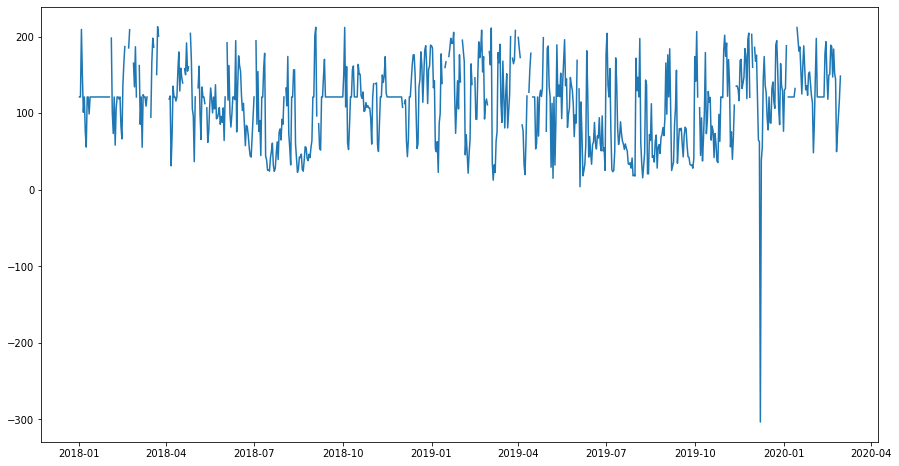

In [21]:
plt.plot(df_ospcb_after_impute['PM10'])

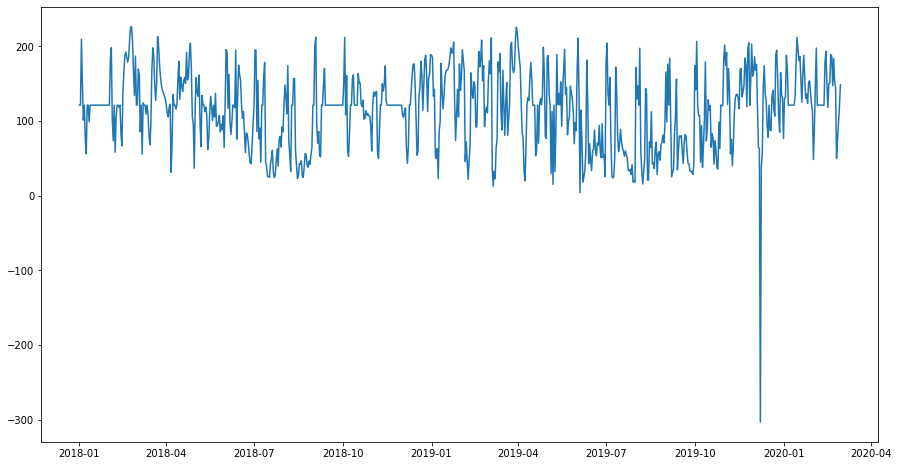

In [22]:
for field in ['PM10','PM2.5','WS','WD','AT']:
   df_ospcb_after_impute[field] = df_ospcb_after_impute[field].interpolate(method = 'spline', order = 3)
plt.plot(df_ospcb_after_impute['PM10'])

In [23]:
for field in cols:
   print(field, df_ospcb_after_impute[field].isna().sum())

PM10 0
PM2.5 0
WS 0
WD 0
AT 0
year 0
month 0
day 0
day_of_week 0
weekend 0


In [24]:
  #df_ospcb_after_impute =  df_ospcb_after_impute.iloc[1:,:]
  df_ospcb_after_impute.head()

,PM10,PM2.5,WD,WS,AT,year,month,day,day_of_week,weekend
Date,,,,,,,,,,
2018-01-01,121.205710,62.935422,174.824048,0.660162,25.619896,2018,1,1,0,0
2018-01-02,121.205710,62.935422,174.824048,0.660162,25.619896,2018,1,2,1,0
2018-01-03,209.367553,96.456277,110.399053,0.787158,25.485895,2018,1,3,2,0
2018-01-04,148.470978,57.417609,131.992043,1.210645,27.404839,2018,1,4,3,0
2018-01-05,101.171569,50.440980,161.040769,1.164038,26.170962,2018,1,5,4,0


In [25]:
cols = ['PM10','PM2.5','WS','WD','AT','year','month','day','day_of_week','weekend']
for field in cols:
   df_ospcb_after_impute[field] = (df_ospcb_after_impute[field] - df_ospcb_after_impute[field].min())/(df_ospcb_after_impute[field].max() - df_ospcb_after_impute[field].min())

df_ospcb_after_impute = df_ospcb_after_impute[['PM2.5','year','month','day','day_of_week','weekend','PM10']]
df_ospcb_after_impute.head()

,PM2.5,year,month,day,day_of_week,weekend,PM10
Date,,,,,,,
2018-01-01,0.664354,0.0,0.0,0.000000,0.000000,0.0,0.801570
2018-01-02,0.664354,0.0,0.0,0.033333,0.166667,0.0,0.801570
2018-01-03,0.806973,0.0,0.0,0.066667,0.333333,0.0,0.968024
2018-01-04,0.640878,0.0,0.0,0.100000,0.500000,0.0,0.853048
2018-01-05,0.611195,0.0,0.0,0.133333,0.666667,0.0,0.763745


In [26]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


# choose a number of time steps
n_steps_in, n_steps_out = 15, 4

X, y = split_sequences(df_ospcb_after_impute.values, n_steps_in, n_steps_out)

X_test, y_test = X[-1], y[-1]

for i in range(n_steps_out):
	X = np.delete(X, X.shape[0] - 1, 0)
	y = np.delete(y, y.shape[0] - 1, 0)

n_features = X.shape[2]
X_svr = X[:,:,0]

In [27]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# regr_multirf = MultiOutputRegressor(SVR(kernel='rbf'))

regr_multirf = MultiOutputRegressor(estimator=SVR(kernel='rbf'))
regr_multirf.fit(X_svr, y)

MultiOutputRegressor(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                   epsilon=0.1, gamma='scale', kernel='rbf',
                                   max_iter=-1, shrinking=True, tol=0.001,
                                   verbose=False),
                     n_jobs=None)

In [28]:
X_test.shape

(15, 6)

In [29]:
X_test = X_test.reshape((1, n_steps_in, n_features))
X_test_new = X_test[:,:,0]
yhat = regr_multirf.predict(X_test_new)

In [30]:
print(X_test_new.shape)
print(yhat.shape)

(1, 15)
(1, 4)


In [31]:
print(yhat.shape)
print(y_test.shape)

(1, 4)
(4,)


In [32]:
X.shape

(769, 15, 6)

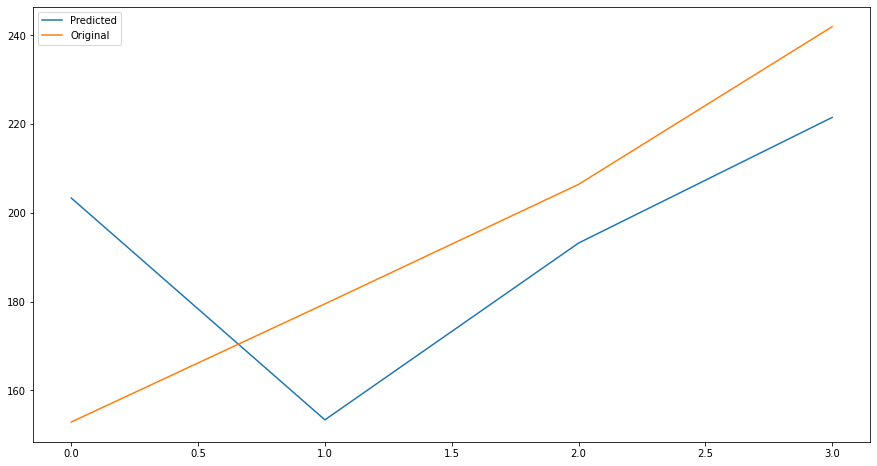

In [33]:
#Setting default Plot Size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,8

# fig, ax = plt.subplots()
plt.plot((yhat[0]*std_dev_ospcb)+mean_ospcb, label = 'Predicted')
plt.plot((y_test*std_dev_ospcb)+mean_ospcb, label = 'Original')
plt.legend()
plt.show()

In [34]:
x_ann = []
counter = 0
for inp_val in X:
 x_input_ann = inp_val.reshape((1, n_steps_in,n_features))
 x_input_ann = x_input_ann[:,:,0]
 y_newpred = regr_multirf.predict(x_input_ann)
 x_ann.append(y_newpred)
 counter = counter + 1
 #print(counter)

x_ann = array(x_ann)

In [35]:
x_ann_new = x_ann[:, 0, :]
x_ann_new.shape
x_ann_new = x_ann_new.reshape(x_ann_new.shape[0], x_ann_new.shape[1], -1)
y_new = y.reshape(y.shape[0], y.shape[1], -1)

In [36]:
from numpy import array
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Bidirectional
from keras.layers import GRU

In [37]:
model_auto = Sequential()
model_auto.add(Bidirectional(GRU(100, activation='relu', input_shape=(x_ann_new.shape[1], x_ann_new.shape[2]),return_sequences=True)))
model_auto.add(Bidirectional(GRU(50, activation='relu', return_sequences=True)))
model_auto.add(Bidirectional(GRU(10, activation='relu')))
model_auto.add(RepeatVector(x_ann_new.shape[1]))
model_auto.add(Bidirectional(GRU(100, activation='relu', return_sequences=True)))
model_auto.add(Bidirectional(GRU(50, activation='relu', return_sequences=True)))
model_auto.add(Bidirectional(GRU(10, activation='relu', return_sequences=True)))
model_auto.add(TimeDistributed(Dense(1)))
model_auto.compile(optimizer='adam', loss='mse')

In [38]:
monitor = EarlyStopping(monitor='loss', min_delta=1e-3, patience=50, verbose=1, mode='auto',
       restore_best_weights=True)
model_auto.fit(x_ann_new, y_new, callbacks=[monitor], validation_split = 0.1, verbose=1, epochs=2000)
#model_auto.save('Auto_improv.h5')

Train on 692 samples, validate on 77 samples
Epoch 1/2000
692/692 [==============================] - 8s 11ms/step - loss: 0.3615 - val_loss: 0.0925
Epoch 2/2000
692/692 [==============================] - 1s 1ms/step - loss: 0.0323 - val_loss: 0.0143
Epoch 3/2000
692/692 [==============================] - 1s 2ms/step - loss: 0.0145 - val_loss: 0.0110
Epoch 4/2000
692/692 [==============================] - 1s 1ms/step - loss: 0.0122 - val_loss: 0.0115
Epoch 5/2000
692/692 [==============================] - 1s 1ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 6/2000
692/692 [==============================] - 1s 1ms/step - loss: 0.0108 - val_loss: 0.0095
Epoch 7/2000
692/692 [==============================] - 1s 2ms/step - loss: 0.0100 - val_loss: 0.0086
Epoch 8/2000
692/692 [==============================] - 1s 1ms/step - loss: 0.0088 - val_loss: 0.0071
Epoch 9/2000
692/692 [==============================] - 1s 1ms/step - loss: 0.0075 - val_loss: 0.0052
Epoch 10/2000
692/692 [=============

In [39]:
y_test_new = y_test.reshape(y_test.shape[0], -1)


In [40]:
y_test_new = y_test_new.T
y_test_new = y_test_new.reshape(y_test_new.shape[0], y_test_new.shape[1], -1)
print(y_test_new.shape)
x_ann_new_input = array(y_test_new)
yhat_new = model_auto.predict(x_ann_new_input, verbose=1)


(1, 4, 1)
1/1 [==============================] - 1s 589ms/step


In [41]:
print(yhat_new.shape)
print(y_test_new.shape)


(1, 4, 1)
(1, 4, 1)


In [42]:
y_test_new_actual = (y_test_new[0]*std_dev_ospcb)+mean_ospcb
yhat_predicted = (yhat_new[0]*std_dev_ospcb)+mean_ospcb


In [43]:
print(yhat_predicted)
print(y_test_new_actual)


[[183.1174 ]
 [184.98984]
 [186.89795]
 [184.32932]]
[[152.85640761]
 [179.4758535 ]
 [206.3949279 ]
 [241.93065117]]


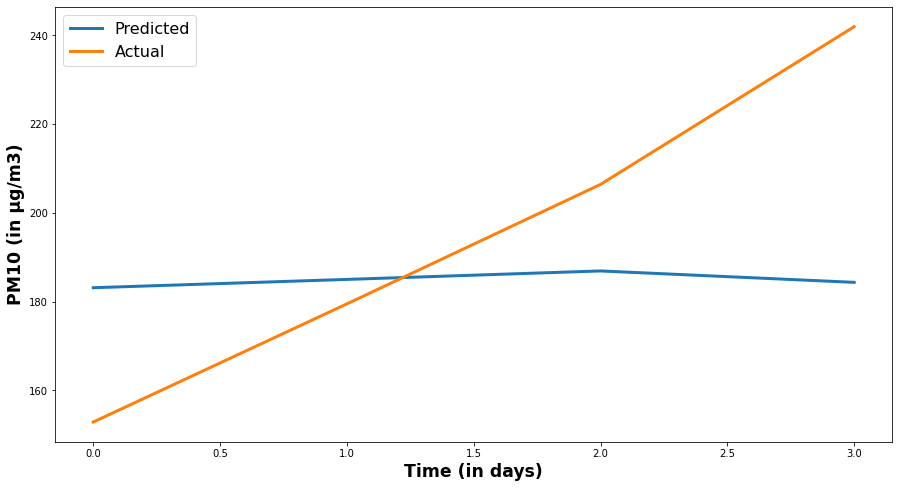

In [44]:
plt.plot((yhat_predicted),label = 'Predicted', linewidth = 3)
plt.plot((y_test_new_actual), label = 'Actual', linewidth = 3)
plt.xlabel('Time (in days)', fontsize = 'xx-large', fontweight = 'bold')
plt.ylabel('PM10 (in µg/m3)', fontsize = 'xx-large', fontweight = 'bold')
plt.legend(prop = {'size': 16})
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
   return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


rms_new = sqrt(mean_squared_error(y_test_new_actual, yhat_predicted))
print(rms_new)

mse_new = mean_squared_error(y_test_new_actual, yhat_predicted)
print(mse_new)

mae_new = mean_absolute_error(y_test_new_actual, yhat_predicted)
print(mae_new)

mape_new = mean_absolute_percentage_error(y_test_new_actual, yhat_predicted)
print(mape_new)

34.07410246165642
1161.0444585674604
28.218323080943108
14.031187037488369
